# Open-Ended Reflection Questions **(23 points)**

### MLP

#### RNN Training Curves

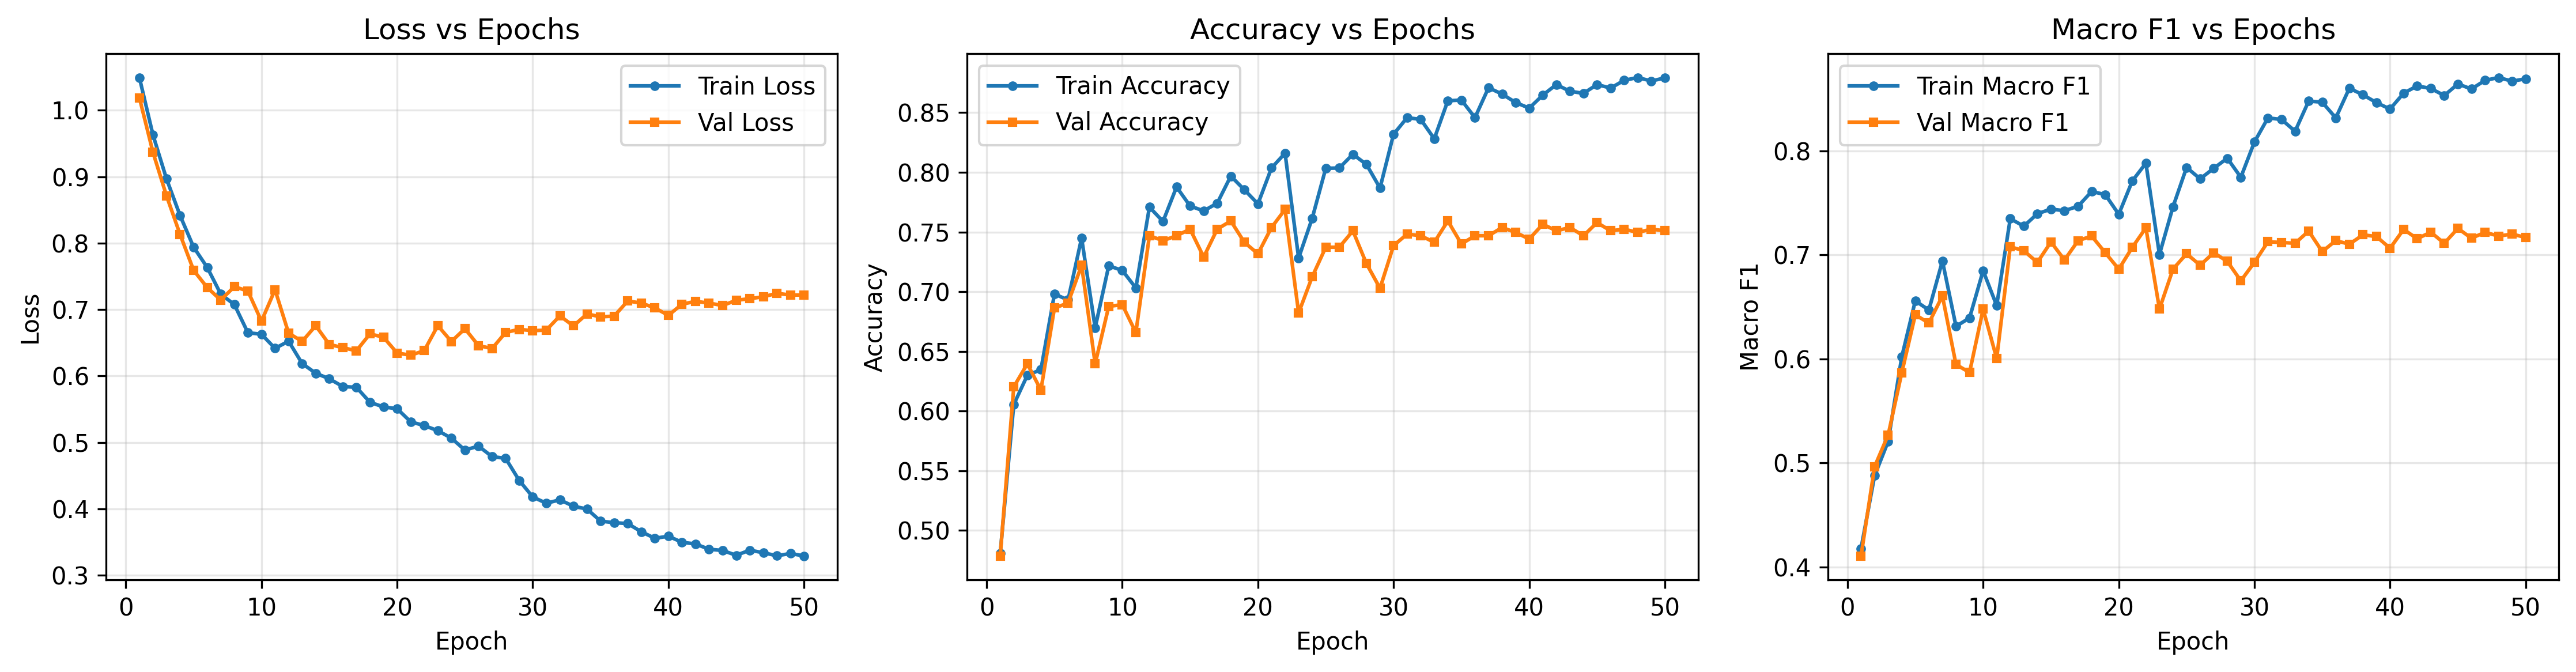

In [21]:
from IPython.display import Image, display

display(Image("outputs/mlp_training_curves.png"))

#### MLP Confusion Matrix

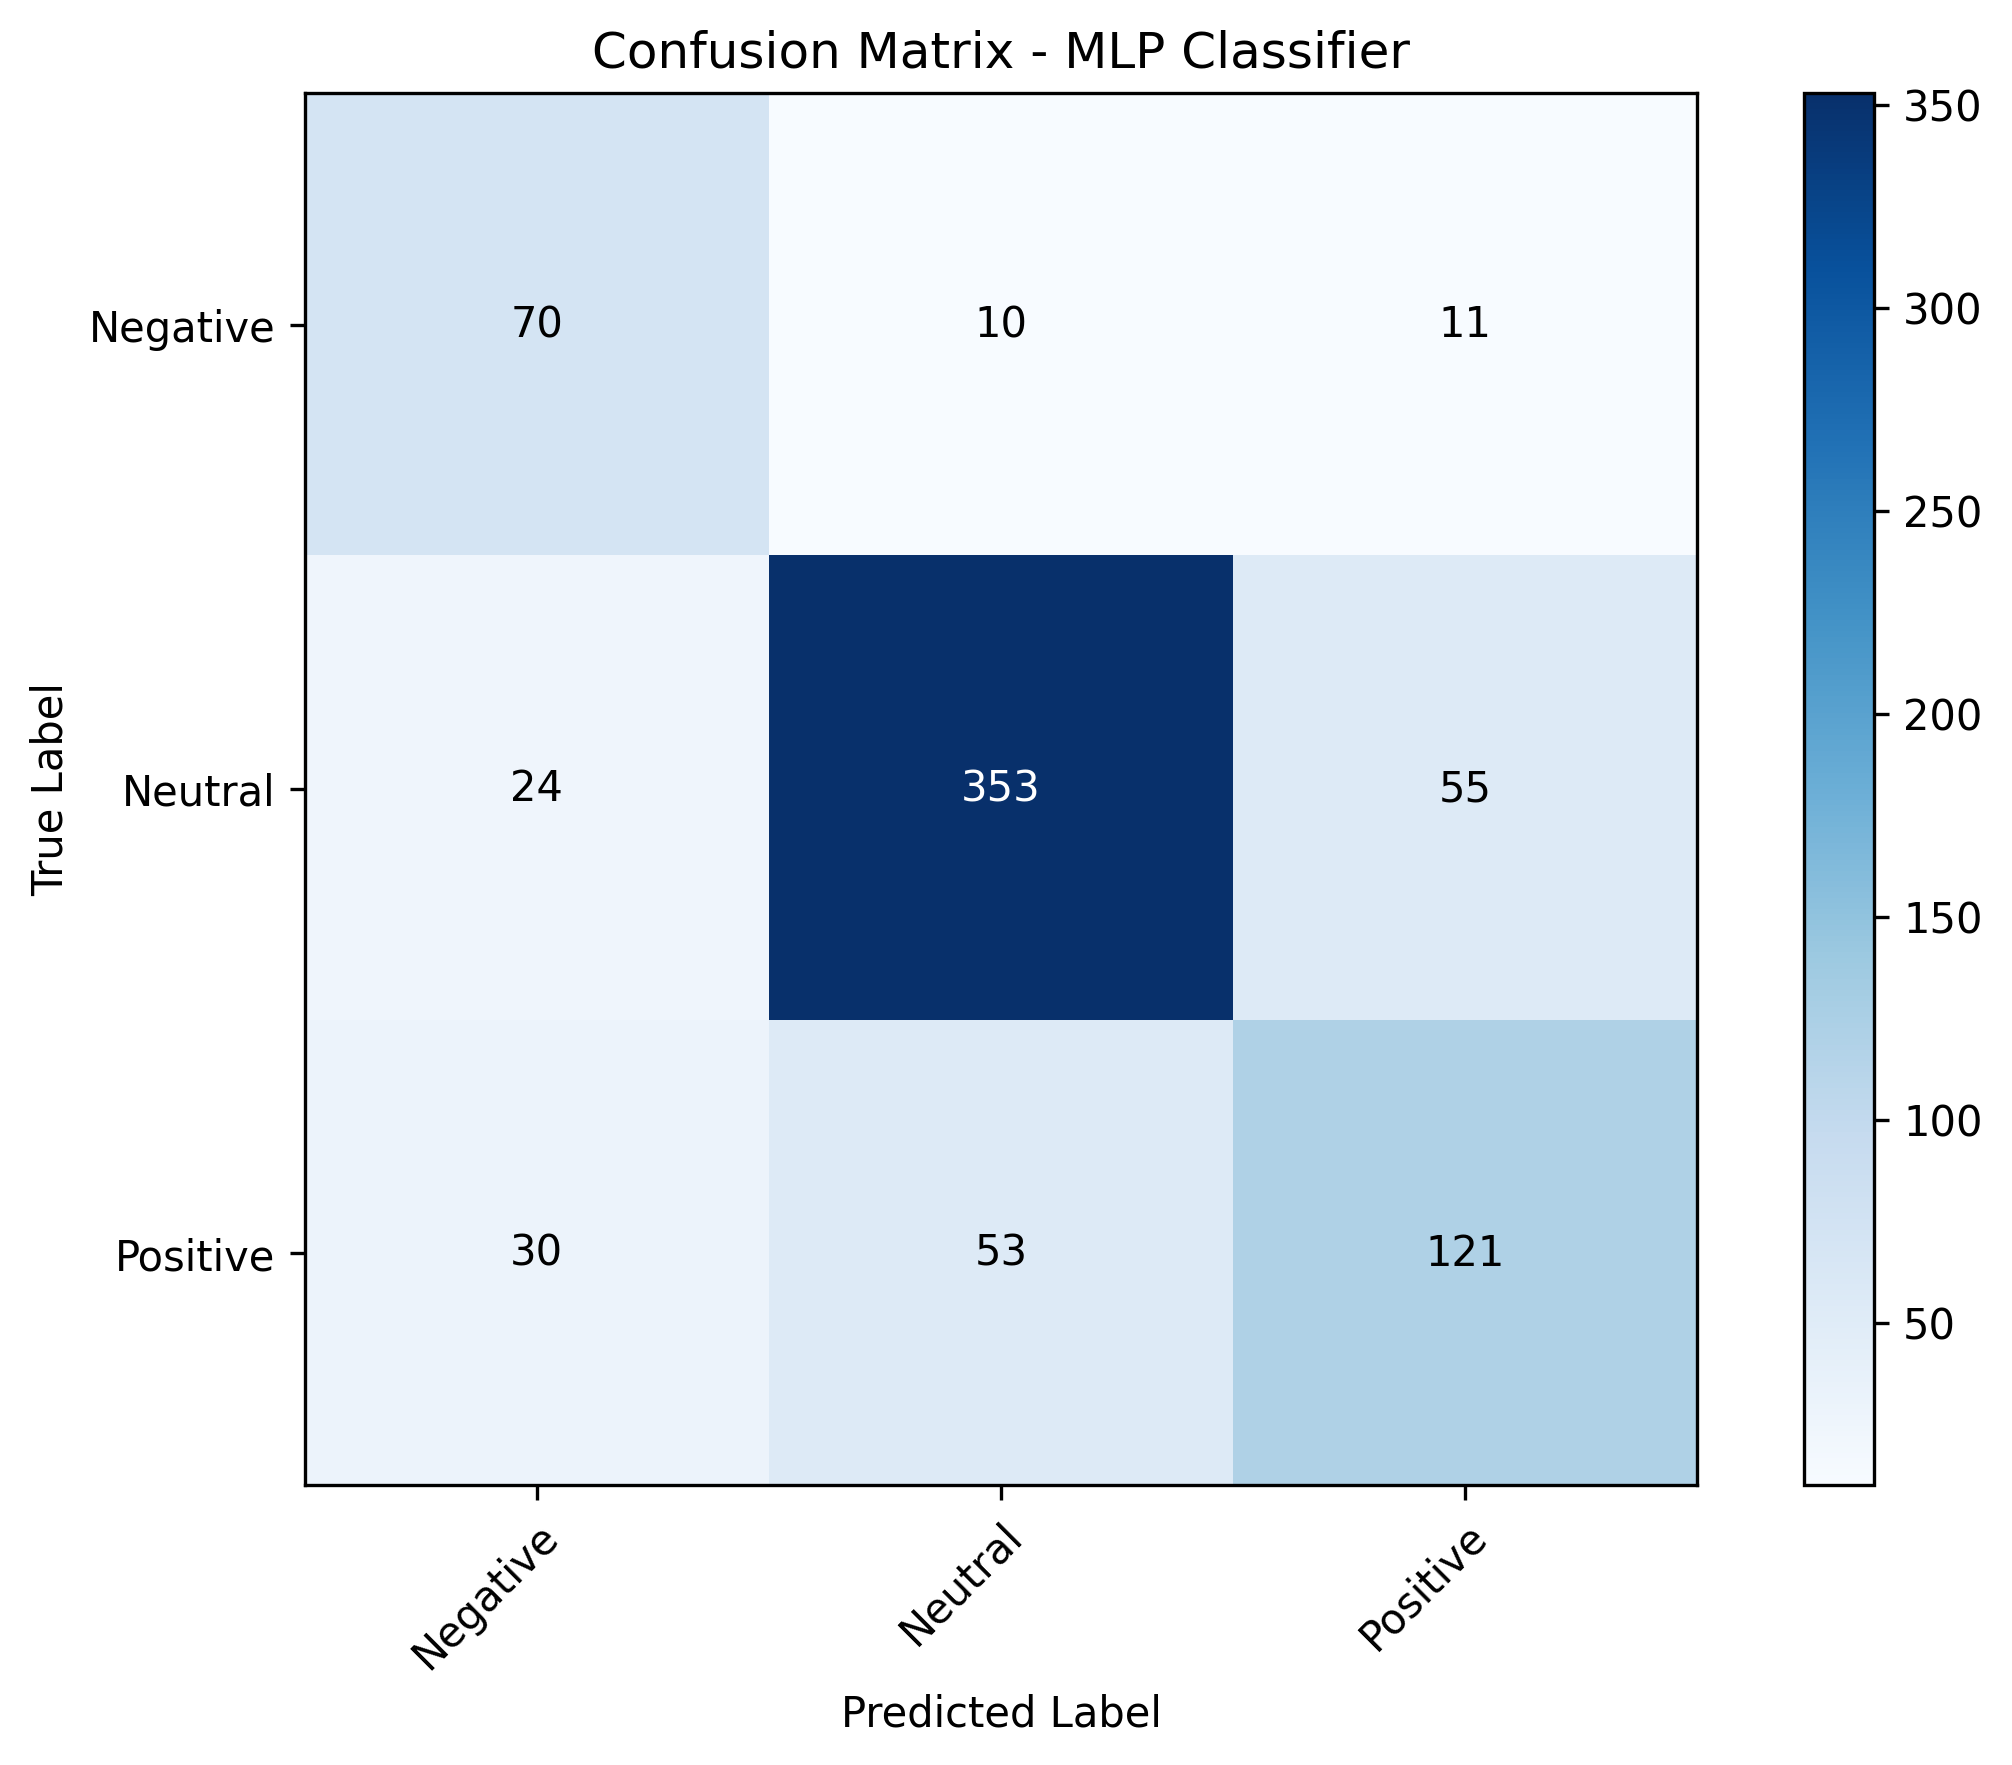

In [18]:
display(Image("outputs/mlp_confusion_matrix.png"))

### LSTM

#### LSTM Training Curves

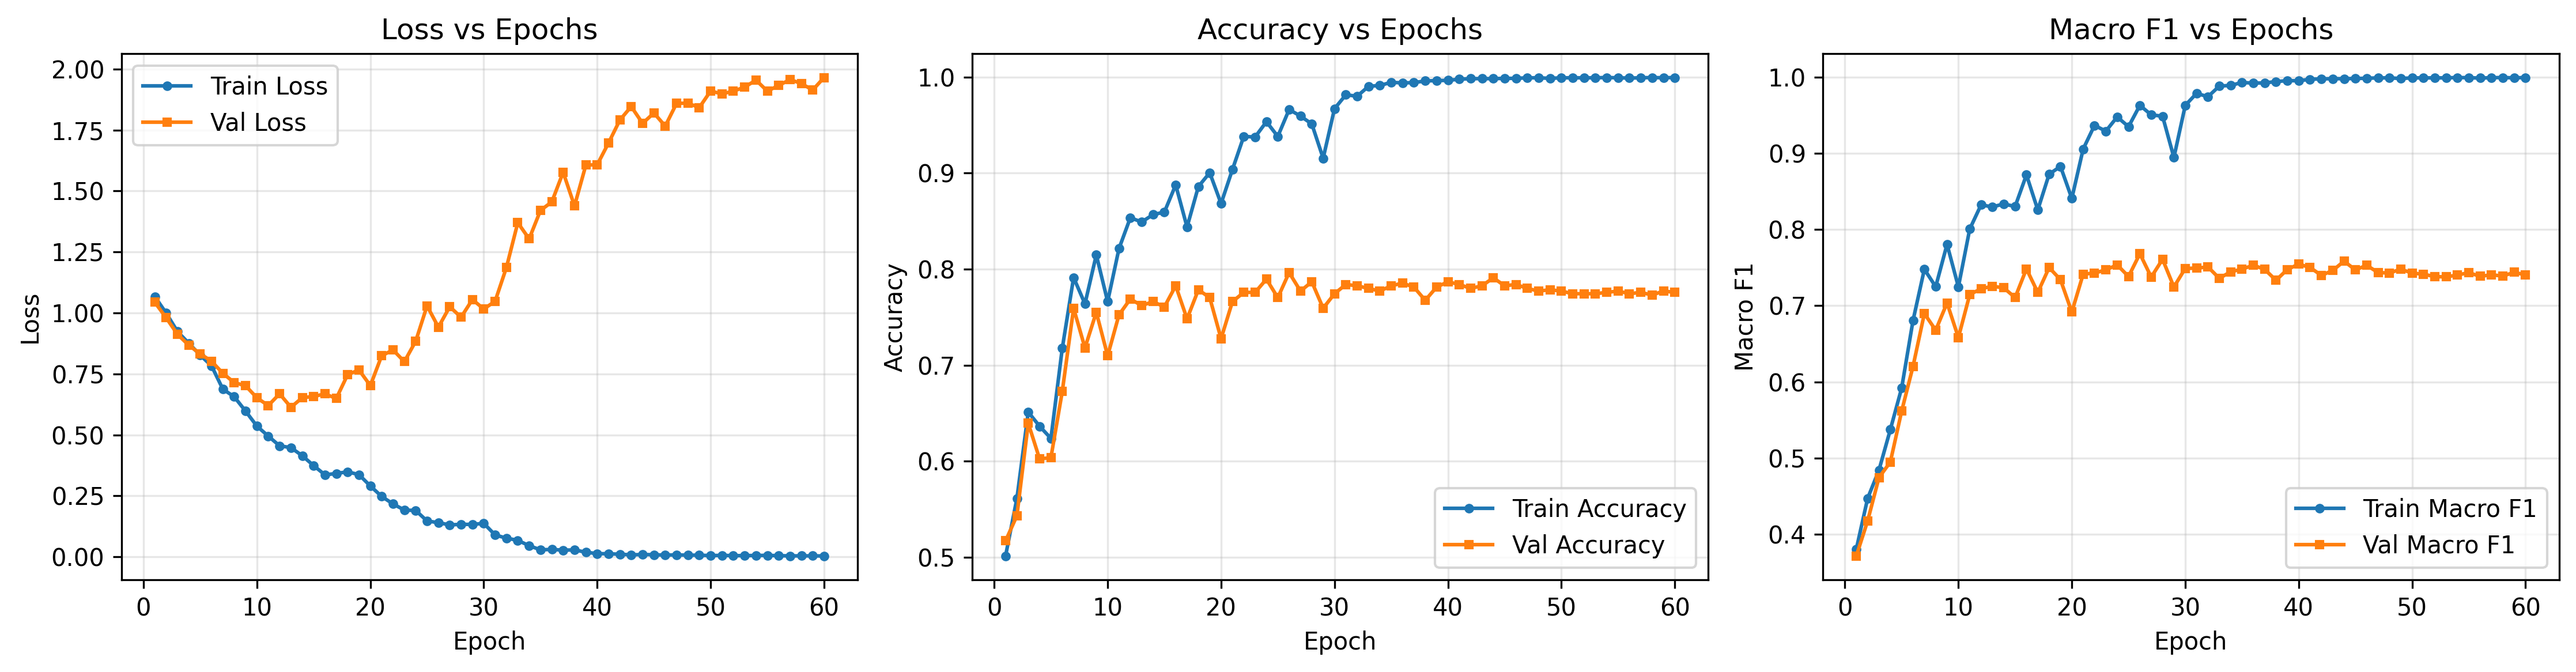

In [19]:
display(Image("outputs/lstm_training_curves.png"))

#### LSTM Confusion Matrix

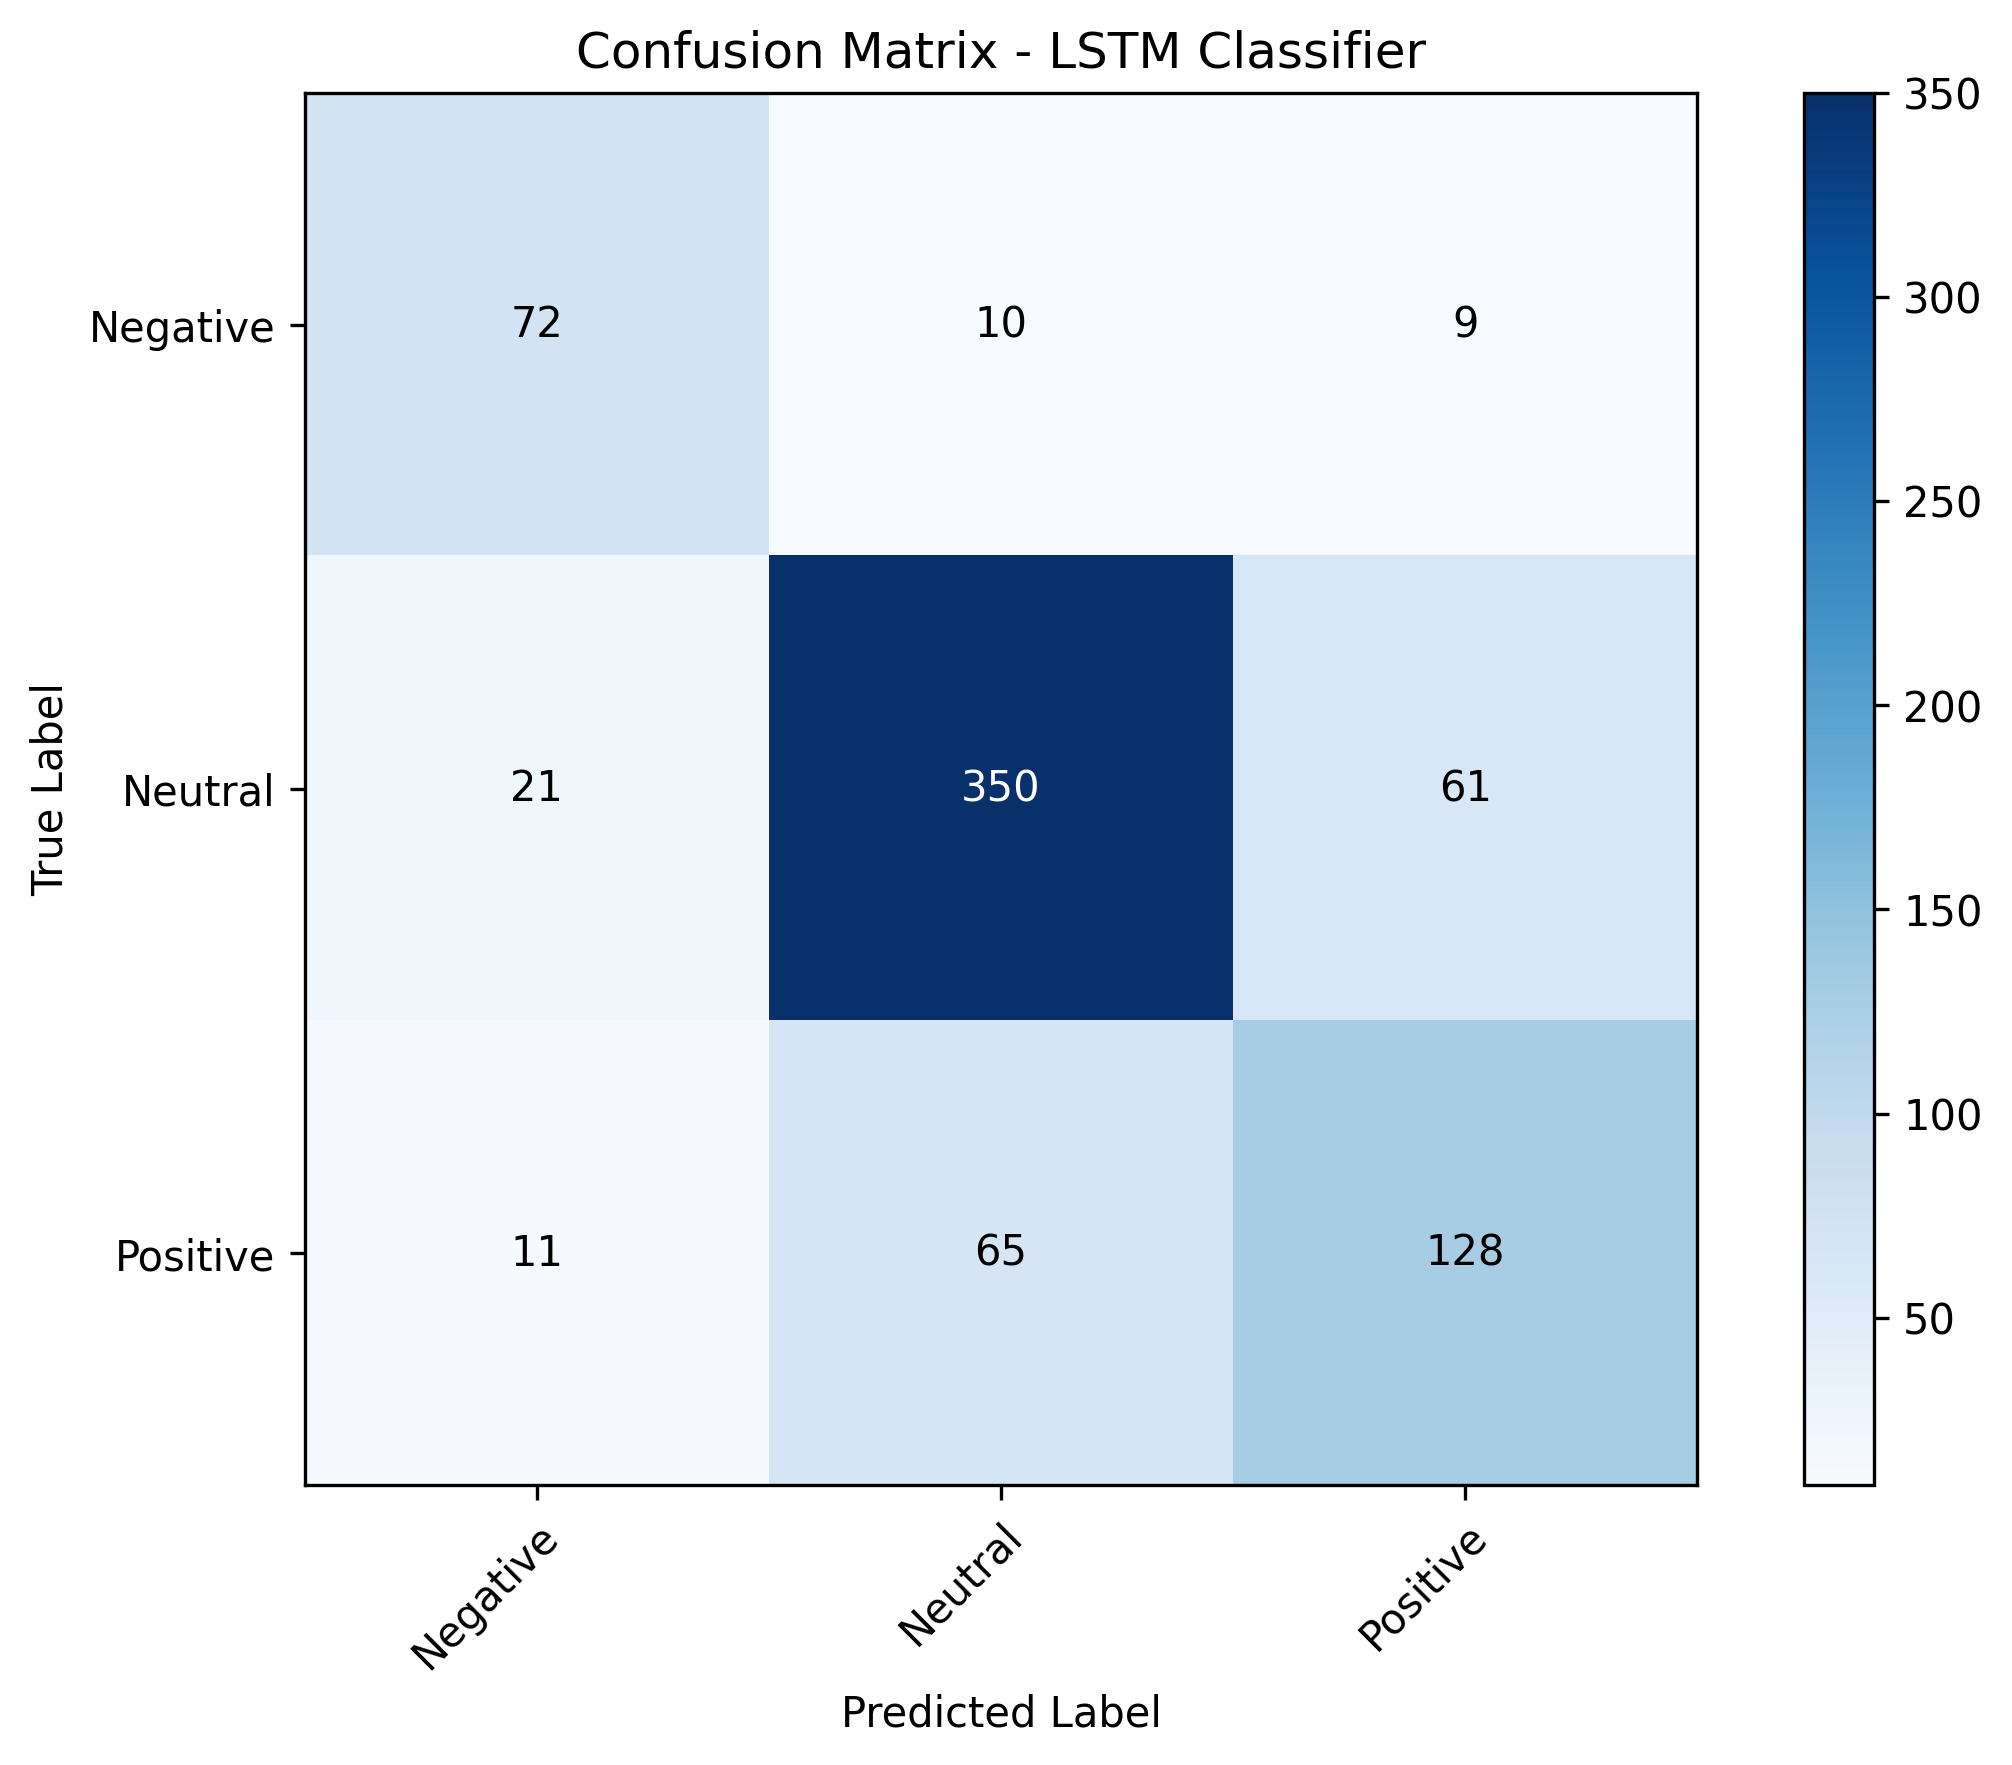

In [20]:
display(Image("outputs/lstm_confusion_matrix.png"))

## 1. Training Dynamics

#### *Focus on your MLP and LSTM implementations*

1. Did your models show signs of **overfitting** or **underfitting**? What architectural or training changes could address this?

The MLP showed mild signs of overfitting. While the training loss and macro F1 continued to improve, validation performance appeared to plateau around 0.71–0.72 macro F1. It did not match training performance. The gap between the training and validation curves indicates that the model began to memorize the training patterns after the early epochs. The limited model representation due to FastText word vectors as well as the small size of the dataset likely caused this issue. In order to reduce overfitting, we could use stronger dropout, weight decay, early stopping based on validation macro F1 (or a parameter we want to optimize for), or smaller hidden layers.

The LSTM showed stronger signs of overfitting since the train loss approaches close to 0 and train accuracy hits around 1.0 soon after 30 epochs. Training macro F1 also hits ~1.0 at the same time, while validation loss rises sharply after the first few epochs and hardly improves after the 10th epoch. Validation accuracy and macro F1 peak around 0.78 and then flatten or slightly degrade. A few fixes could be early stopping, adding dropout inside or after the LSTM, and reducing LSTM hidden size or number of layers. Increasing weight decay, gradient clipping, and considering freezing or smoothing the embeddings are also possible solutions.

2. How did using **class weights** affect training stability and final performance?

Using class weights generally improved macro-average performance by preventing the MLP and LSTM from collapsing to the majority neutral class. Since the dataset is inherently imbalanced, a model that is trained without this class weighting would generally optimize for overall accuracy by over-predicting the Neutral category. This leads to poor recall on the Negative and Positive classes which would be a low macro F1 score.

For the MLP, class weighting generally helped maintain a reasonable recall on the negative class even with a smaller sample size. The confusion matrix shows that the model didn't overwhelmingly predict Neutral. This suggests that minority class errors were punished sufficiently during the training process. Even though class weighting may introduce noisier gradients the training trajectory generally remained stable and converged.

For the LSTM the class weight was especially important since LSTM has higher capacity and can overfit. It could otherwise exploit the dominant class distribution in order to maximize accuracy. The weighted loss encouraged a balanced learning across all 3 classes. This contributed to stronger macro F1 performance compared to the MLP especially for an improved minority-class recall. Overall, the class weighting slightly increased training variance early on but substantially improved balanced generalization and final macro F1 performance.

## 2. Model Performance and Error Analysis

#### *Focus on your MLP and LSTM implementations*

1. Which of your two models **generalized better** to the test set? provide evidence from your metrics.

The LSTM generalized better to the test set since we can see higher validation and test macro F1 scores compared to the MLP. The LSTM achieved about a 0.74–0.75 macro F1 while the MLP plateaued and stopped improving around 0.71–0.72. Since F1 is the primary evaluation metric in this imbalanced setting, this indicates stronger balanced generalization. The accuracy scores also generally show the same thing, with the LSTM around 0.78–0.79 and the MLP at around 0.75. The confusion matrices also show that the LSTM correctly classified more minority-class examples (72 vs 70 and 128 vs 121). Although the LSTM model exhibited stronger overfitting, its sequential modeling capability allowed it to generalize better than the mean-pooled MLP representation.

2. Which **sentiment class** was most frequently misclassified? Propose reasons for this pattern.

The sentiment class "Positive" was most frequently misclassified with the "Neutral" sentiment class. In the MLP and LSTM confusion matrices, a substantial number of Positive examples were predicted as Neutral and vice versa. This pattern could be because of the guarded or reserved language used in financial reporting. Financial statements express only mild optimism or cautious improvements, which can certainly blur the boundary between Positive and Neutral sentiment. A lot of financial statements have disclaimers at the bottom explicitly flagging forward-looking language as expectations and not "guarantees". Unlike clearly negative statements with strong cues such as "decline" or "loss," positive financial terms are often accompanied by more neutral sentiments such as "stable growth" or "expected improvement," which makes it harder for the models to distinguish positive from factual or neutral reporting. Additionally, since Neutral is the majority class, the models may be slightly biased toward predicting it when uncertain. 

## 3. Cross-Model Comparison

### RNN

#### RNN Training Curves

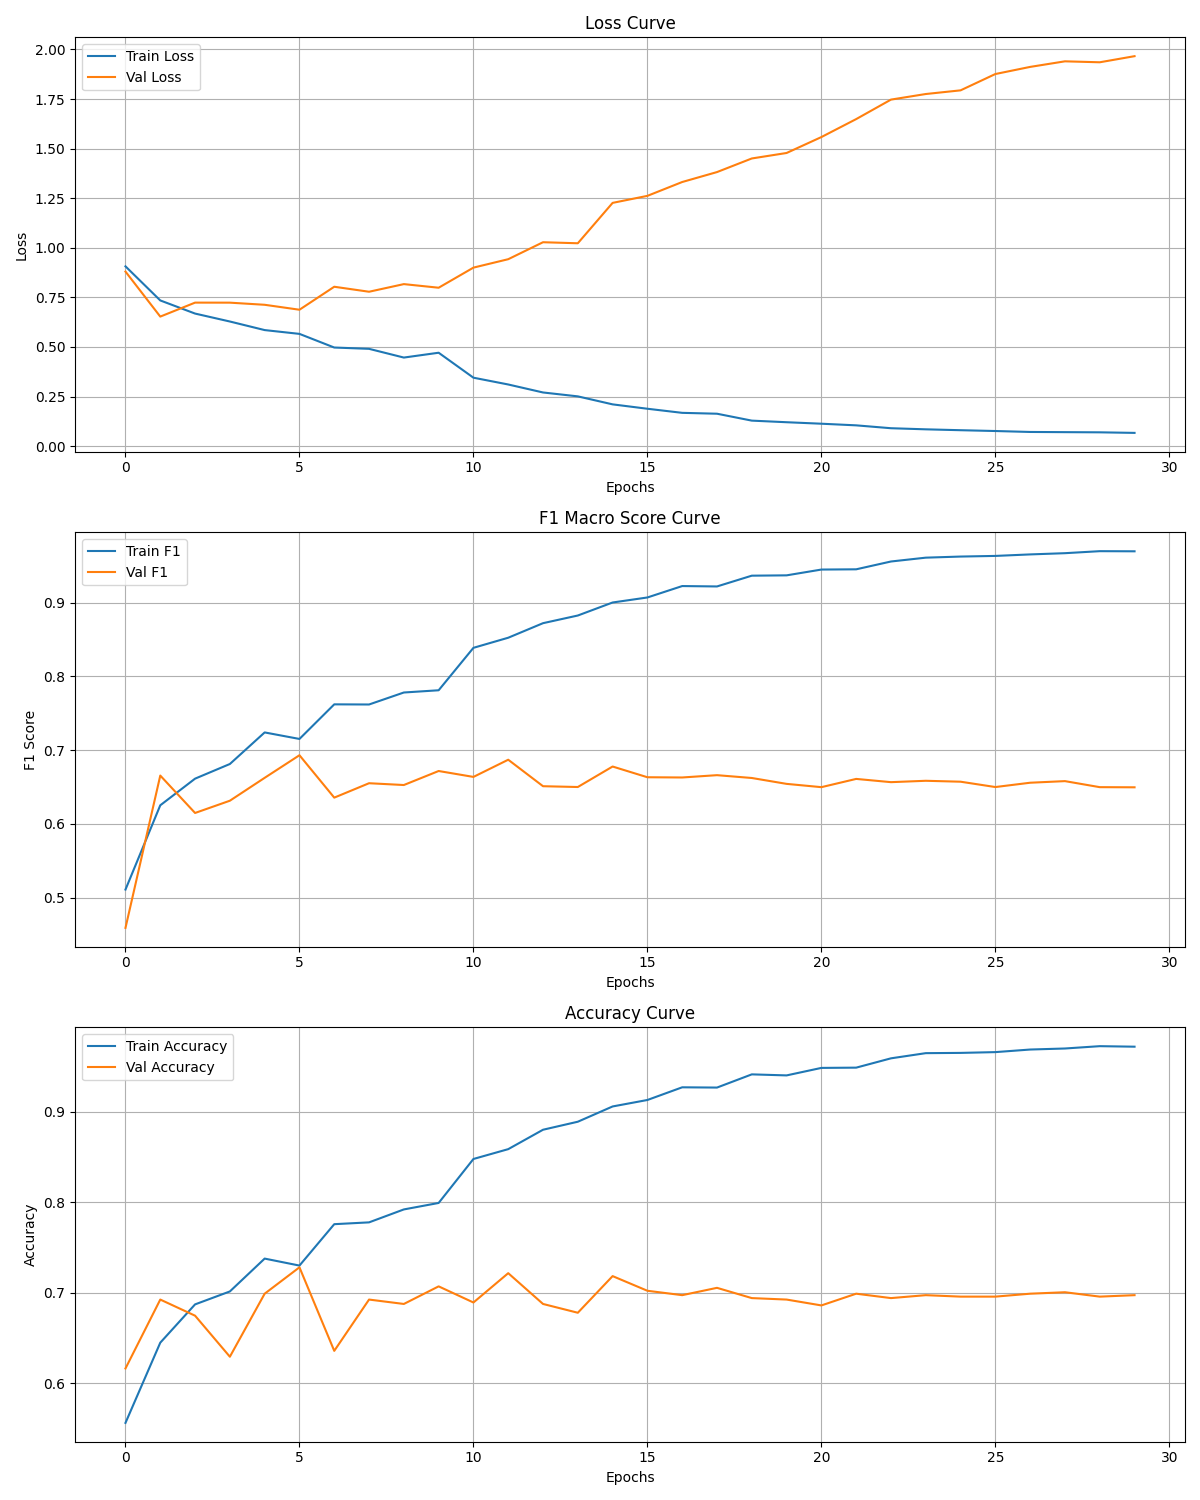

In [11]:
display(Image("outputs/rnn_f1_learning_curves.png"))

#### RNN Confusion Matrix

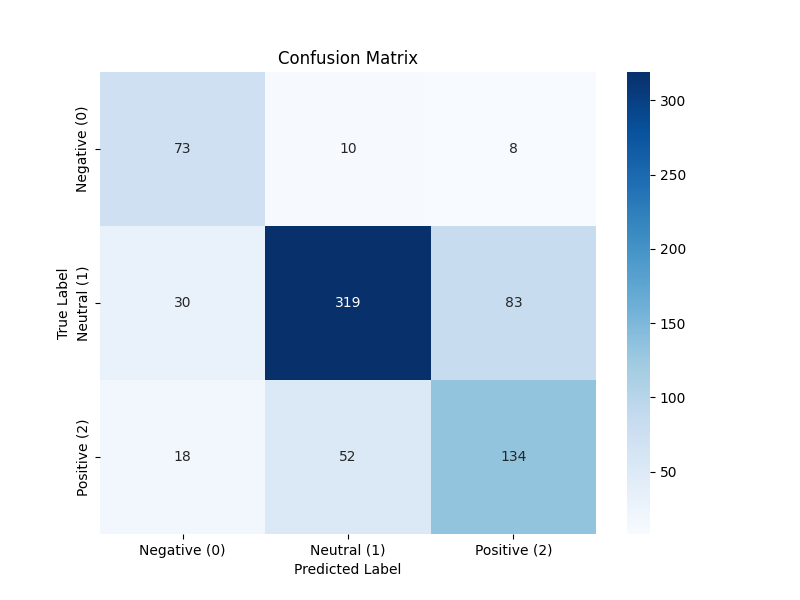

In [10]:
display(Image("outputs/rnn_confusion_matrix.png"))

### GRU

#### GRU Training Curves

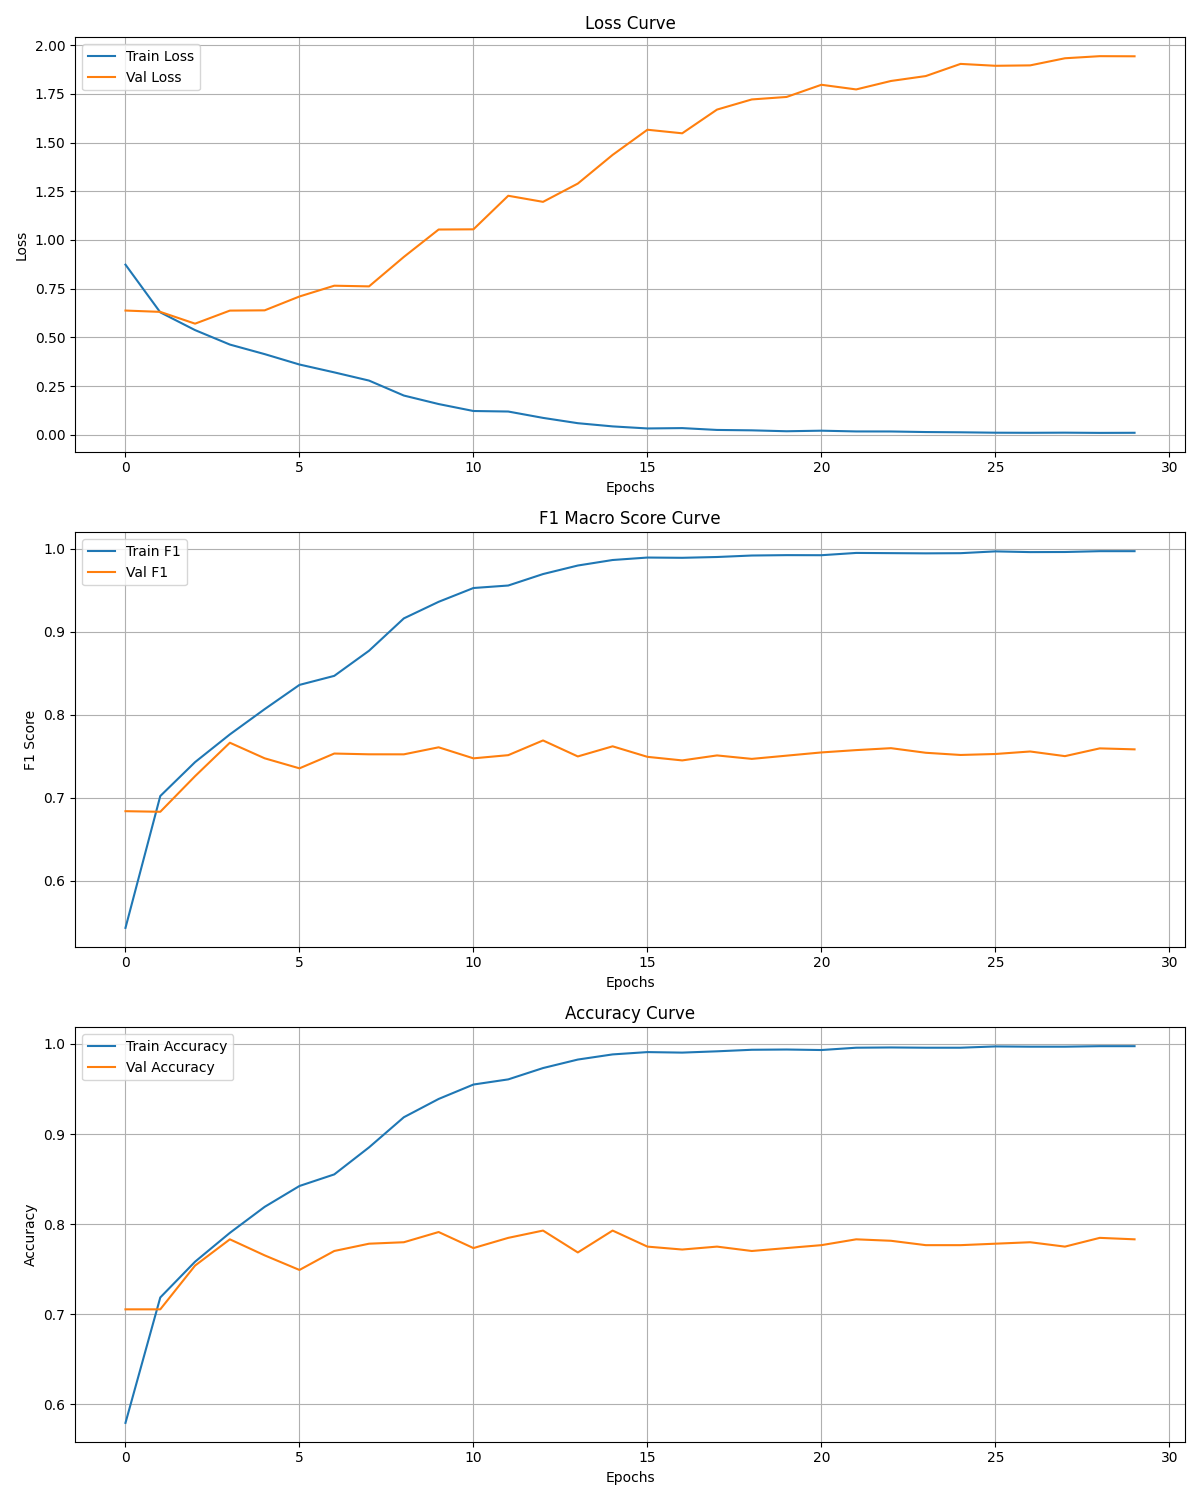

In [12]:
display(Image("outputs/gru_f1_learning_curves.png"))

#### GRU Confusion Matrix

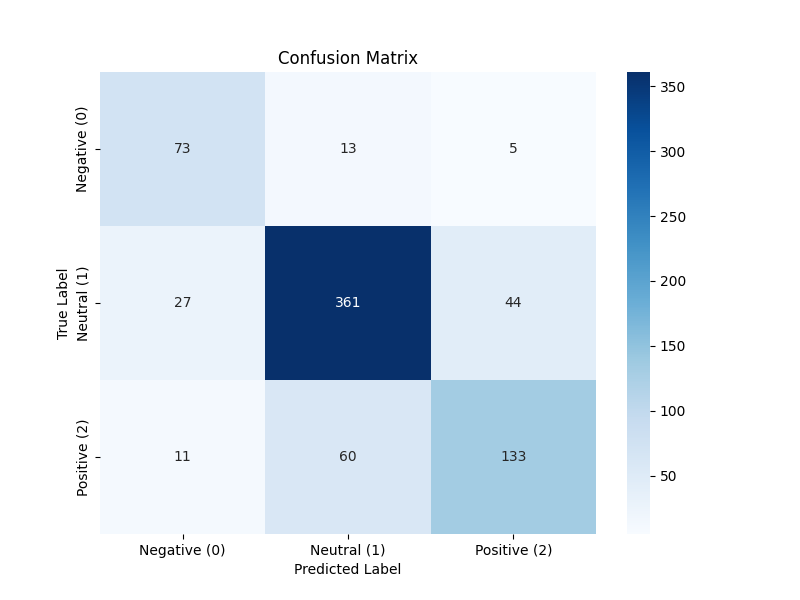

In [13]:
display(Image("outputs/gru_confusion_matrix.png"))

### BERT

#### BERT Training Curves

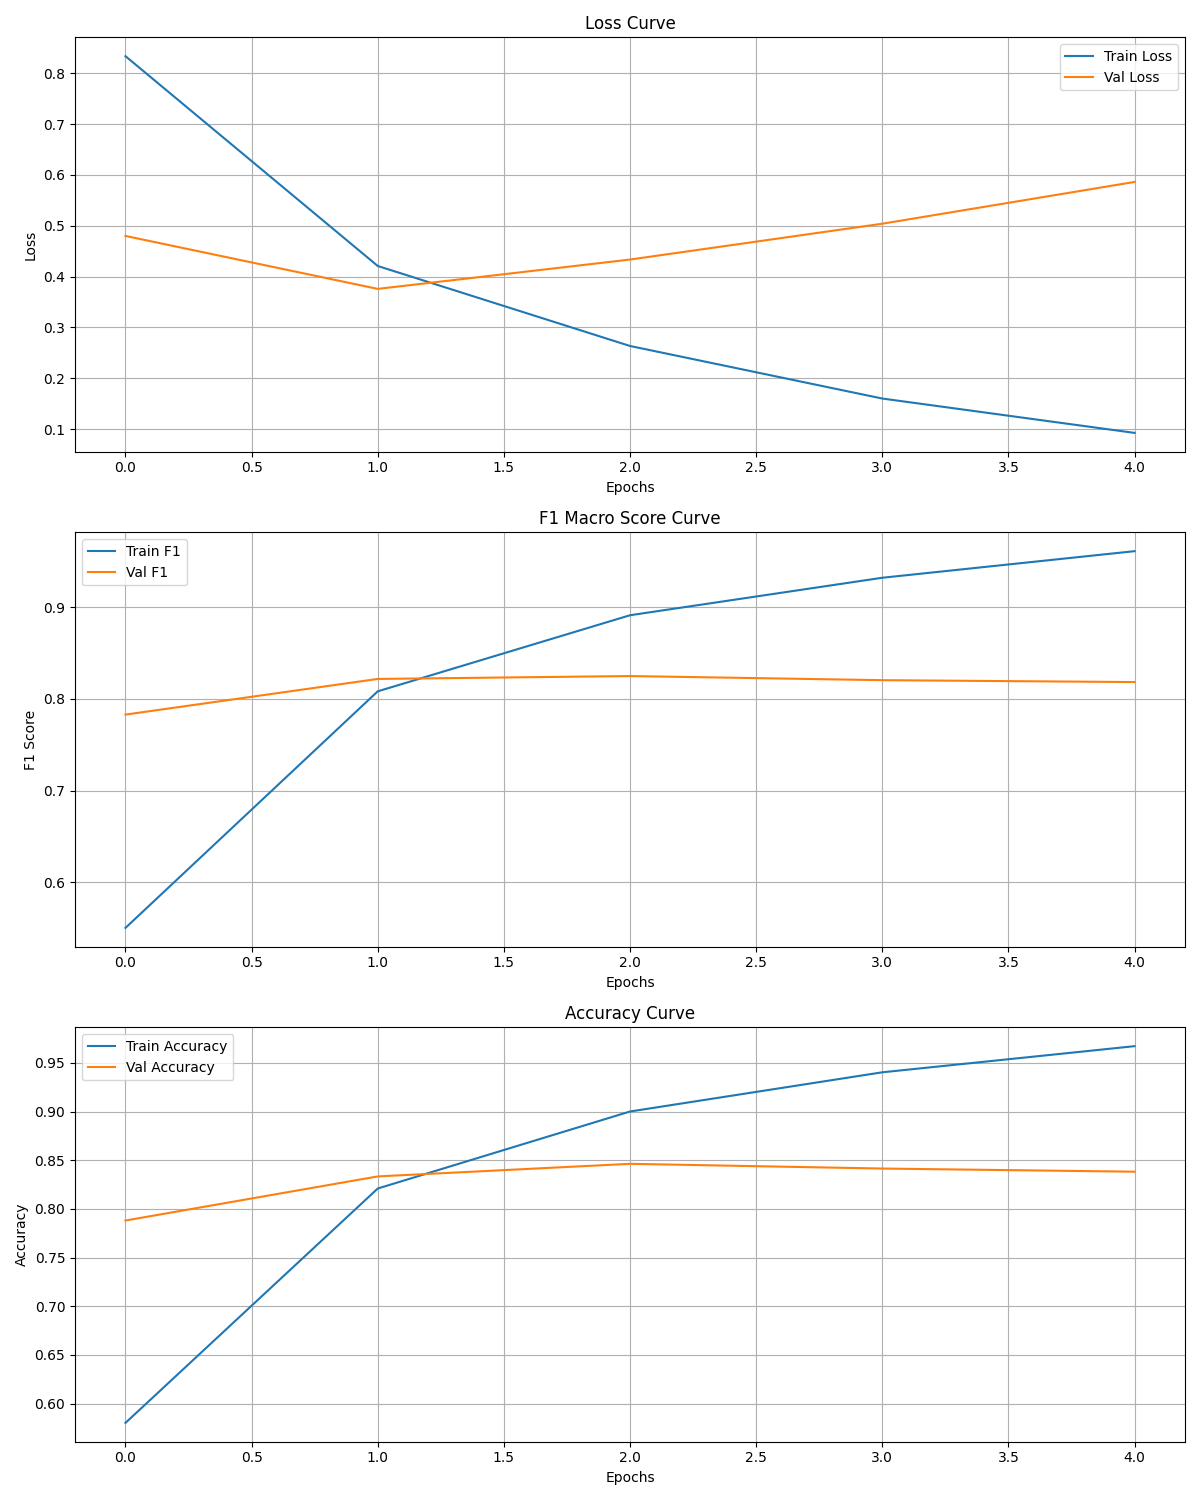

In [14]:
display(Image("outputs/bert_f1_learning_curves.png"))

#### BERT Confusion Matrix

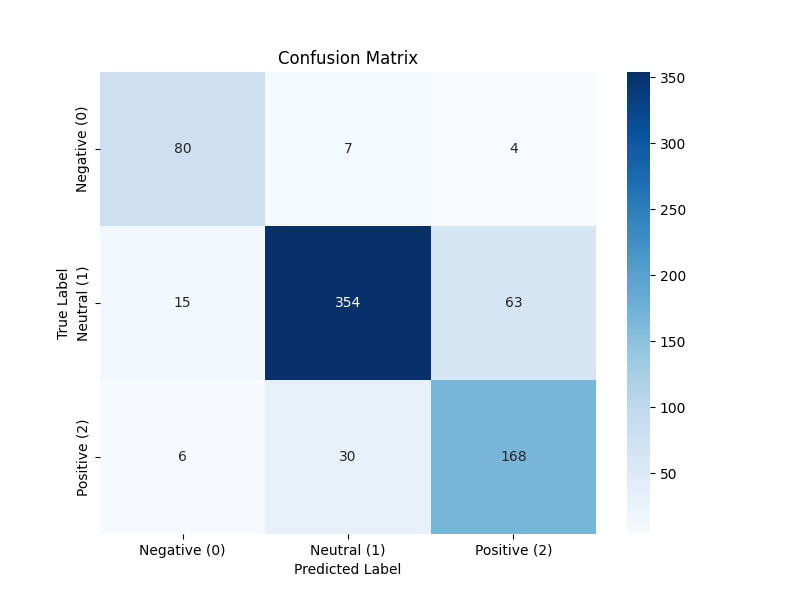

In [15]:
display(Image("outputs/bert_confusion_matrix.png"))

### GPT

#### GPT Training Curves

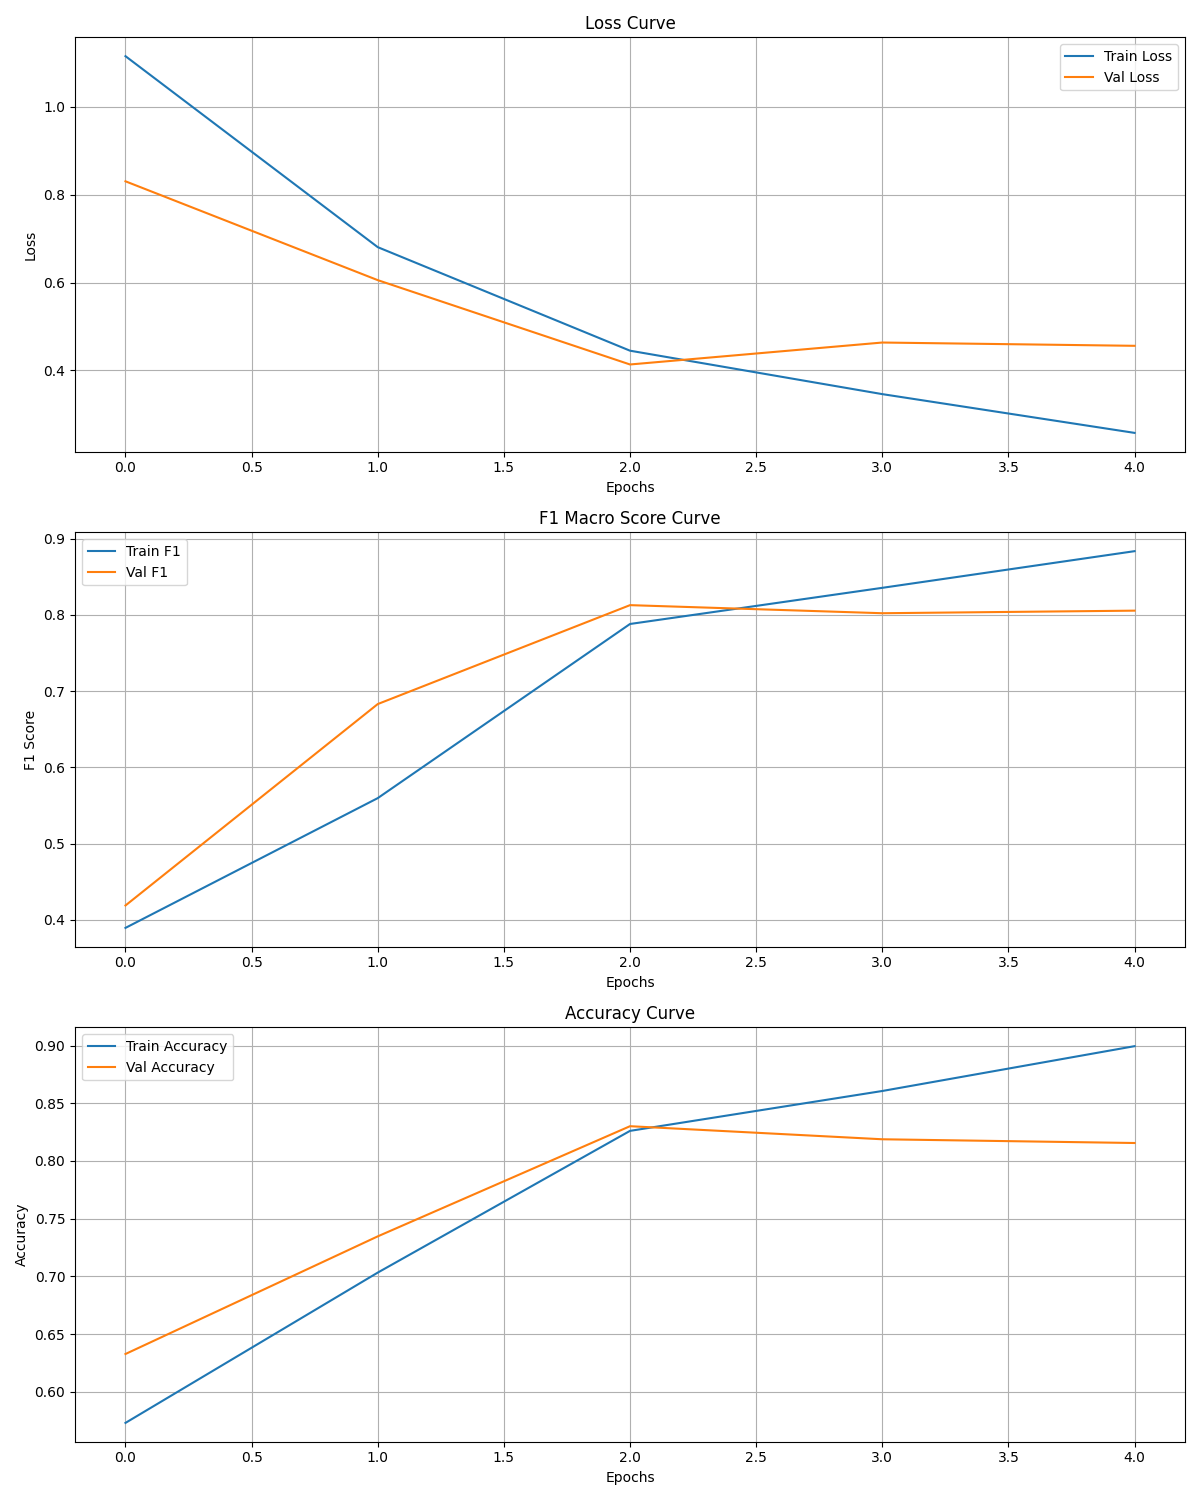

In [16]:
display(Image("outputs/gpt_f1_learning_curves.png"))

#### GPT Confusion Matrix

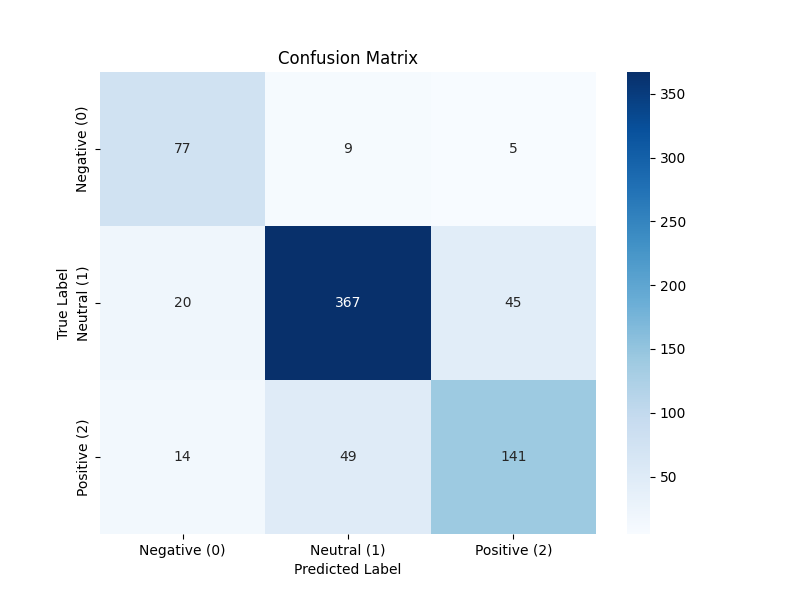

In [17]:
display(Image("outputs/gpt_confusion_matrix.png"))

#### *Compare all six models: MLP, RNN, LSTM, GRU, BERT, GPT*

1. How did **mean-pooled FastText embeddings** limit the MLP compared to sequence-based models?

The mean-pooled FastText embeddings limited the MLP compared to the others. It collapses an entire sentence into a single averaged 300-dim vector which removes word order information, syntactic structure, long-range dependencies, and also contextual interactions between words. As a result the MLP treats the sentence as if it is a bag of words with static embeddings. It can't distinguish meaning changes that are caused by word order. An example would be negation or contrast and in financial sentiment context is crucial which is why averaging embeddings weakens the signal.

2. What advantage did the LSTM’s **sequential processing** provide over the MLP?

The LSTM processes tokens sequentially which allows it to do a few things. The things it allows are 1. preserving word order, 2. modeling dependencies across time steps, 3. maintaining a hidden state that carries contextual information, and 4. capturing sentence shifts within a sentence. This sequential modeling enables the LSTM to distinguish phrases such as "profits increased but outlook is weak," which has a negative sentiment, and "losses narrowed significantly," which is positive. Unlike the MLP, the LSTM doesn't destroy structure through averaging. The gating mechanism can help retain contextual signals across longer spans.

3. Did **fine-tuned LLMs** (BERT/GPT) outperform classical baselines? Explain the performance gap in terms of pretraining and contextual representations.


Fine-tuned LLMs such as the BERT and GPT outperformed all classical baselines. The reasons are as follows.

First there is  massive pretraining since BERT and GPT were pretrained on a huge corpora of data which learn rich semantic representations, grammar and syntactic patterns, financial-style contextual signals and long-range relationships. Classical models started from scratch which means they only learned from the small Financial Phrasebank dataset.

Secondly, LLMs use self-attention which allows every token to attend to every other token and captures the global context in O(1) path length. Models also use long-range interactions efficiently. On the other hand RNN/LSTM/GRU processes sequentially which weakens signal retention across long distances. Finally MLP has no notion of sequence or interaction which, in accordance with the first question, is why it performed the worst. Thus, LLM embeddings are dynamic and contextual while the FastText embeddings are static.

4. **Rank all six models** by test performance. What architectural or representational factors explain the ranking?

All six models ranked by test performance based on observed performance are as follows: 

Ranking by Test Macro F1 (Correct Ranking)

1. BERT – 0.8197
2. GPT – 0.7776
3. GRU – 0.7485
4. LSTM – 0.7307
5. MLP – 0.7009
6. RNN – 0.6994

This makes sense because BERT uses bidirectional self-attention and deep contextual embeddings. It inherently has strong pre-training but has the best minority-class balance which makes it the best model. Second is GPT that has transformer architecture and also strong pre-training but is slightly weaker than BERT for classification since GPT is autoregressive. GRU performs using a gated recurrent model, more efficient long-term dependency retention than a regular RNN and is slightly simpler than LSTM which might generalize better. LSTM is fourth because it captures sequence structure and gating helps with long-range dependency which is why it is slightly below GRU. MLP uses the mean-pooled FastText with no sequence modeling and loses contextual nuance. Finally RNN is the worst since it has no gating, suffers from vanishing gradients, and has weak long-distance dependency modeling.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
I used GPT-5.2 and Claude 4.5 Sonnet.

I used these models to code the frameworks for my code and point me in directions to optimize the parameters that I needed. The biggest thing that I used AI for was for conceptual differentiation and understanding of nuance between the models. Documentation was extremely important to me so I asked about that quite a lot. I also prompted GPT to resolve my dependency issues before rendering.

I reran all training scripts end-to-end which ensured reproducibility with the fixed random seed and confirmed that the train/validation/test splits were consistent. I also checked the tensor shapes for both models ((MLP: batch_size, 300) and LSTM: (batch_size, 32, 300)). I also verified class weights were applied correctly in CrossEntropyLoss and also confirmed that the saved training curves and confusion matrices matched reported validation and test metrics. Finally I reviewed PyTorch and Hugging Face documentation to ensure correct use of optimizers, schedulers, and model evaluation procedures.